### Principal Component Analysis

In [33]:
# First we load some data
import pickle

data = pickle.load(open( "dataset.pkl", "rb" ))
print("Loaded %s entries" % len(data))

Loaded 146 entries


In [36]:
import pandas as pd

df = pd.DataFrame(data).T
df.columns

Index(['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
       'email_address', 'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'other', 'poi', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value'],
      dtype='object')

In [161]:
import matplotlib.pyplot as plt

incentive_bonus = df.loc[:, ['bonus', 'long_term_incentive']]

In [162]:
import numpy as np

# Drop total column
incentive_bonus = incentive_bonus.drop(["TOTAL"])

# Drop null values
incentive_bonus.replace(["NaN", 'NaT'], np.nan, inplace = True)
incentive_bonus = incentive_bonus.dropna(axis=0, how='any')

incentive_bonus.head()

,bonus,long_term_incentive
ALLEN PHILLIP K,4175000.0,304805.0
BAXTER JOHN C,1200000.0,1586055.0
BERGSIEKER RICHARD P,250000.0,180250.0
BIBI PHILIPPE A,1000000.0,369721.0
BLACHMAN JEREMY M,850000.0,831809.0


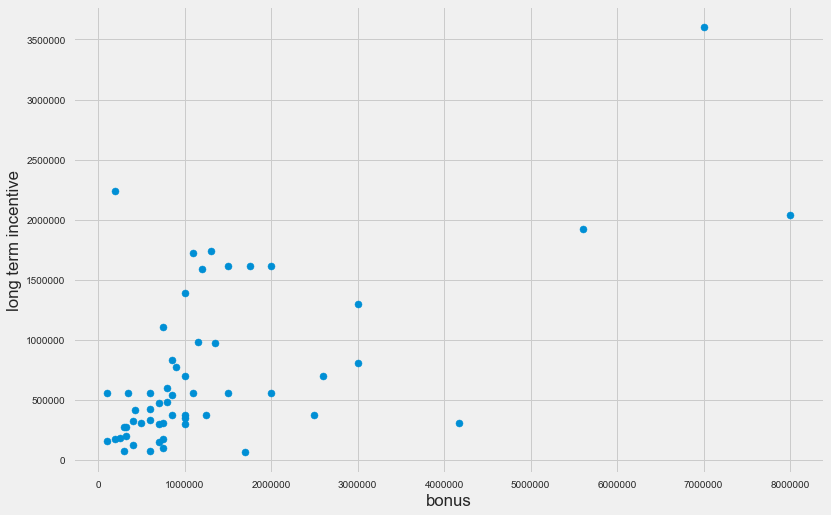

In [207]:
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
plt.scatter(incentive_bonus.bonus, incentive_bonus.long_term_incentive)
plt.xlabel("bonus")
plt.ylabel("long term incentive")
plt.show()

In [164]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(incentive_bonus)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [165]:
# Print the eigenvalues which tell how much of the variance 
# is explained by its corresponding eigenvector
print(pca.explained_variance_ratio_)

[ 0.90774318  0.09225682]


In [178]:
# Now print the eigenvectors of the coviarance matrix XX.T
first_eigenvector = pca.components_[0]
second_eigenvector = pca.components_[1]
print(first_eigenvector)
print(second_eigenvector)

[ 0.95461919  0.29782915]
[-0.29782915  0.95461919]


In [216]:
# Transform the data according to the principal components
transformed_data = pca.transform(incentive_bonus)

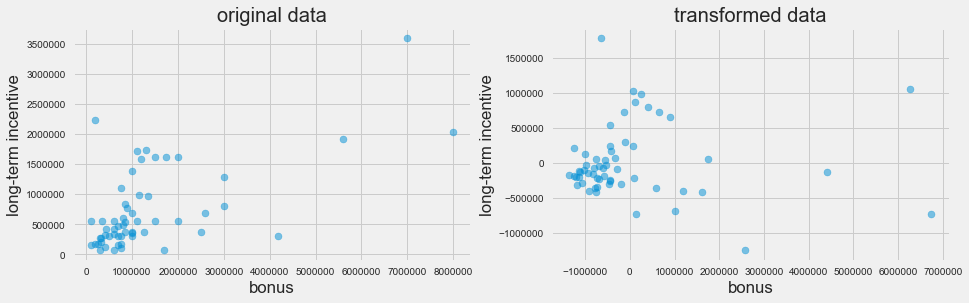

In [234]:
# First we compare the original and the transformed data
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.scatter(incentive_bonus.iloc[:, 0], incentive_bonus.iloc[:,1], alpha=0.5)
plt.title("original data")
plt.xlabel("bonus")
plt.ylabel("long-term incentive")
plt.subplot(1,2,2)
plt.scatter(transformed_data[:, 0], transformed_data[:,1], alpha=0.5)
plt.xlabel("bonus")
plt.ylabel("long-term incentive")
plt.title("transformed data")
plt.show()

We see, that pca is a linear transformation which consists of rotation and translation only

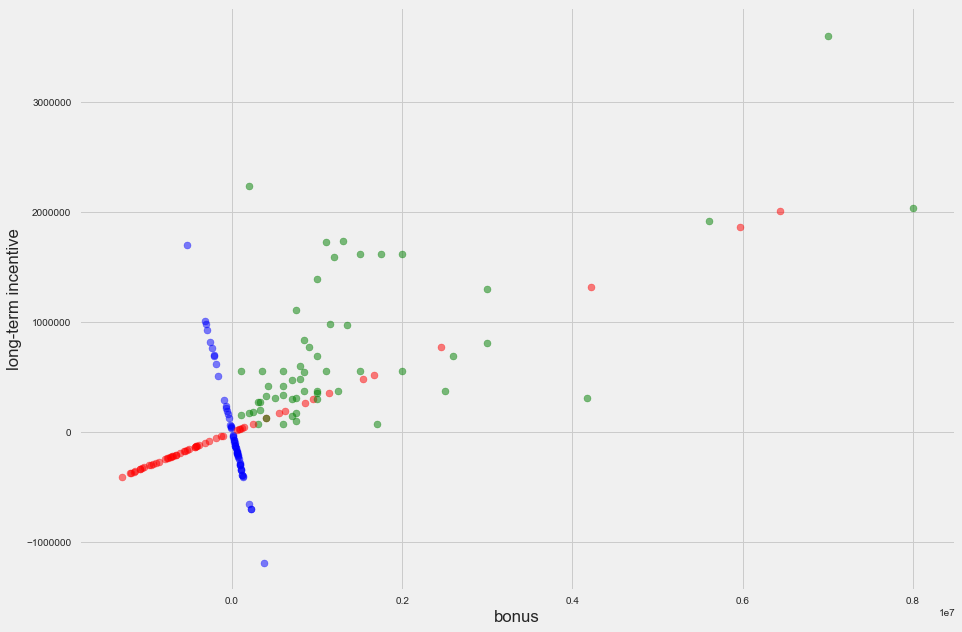

In [244]:
# Plot the transformed data together with the original
from matplotlib.pyplot import cm 

plt.style.use('fivethirtyeight')
plt.figure(figsize=(14, 10))
for i_transformed, i_original in zip(transformed_data, incentive_bonus.values):
    plt.scatter(first_eigenvector[0] * i_transformed[0], first_eigenvector[1] * i_transformed[0], c="r", alpha=0.5)
    plt.scatter(second_eigenvector[0] * i_transformed[1], second_eigenvector[1] * i_transformed[1], c="b", alpha=0.5)
    plt.scatter(i_original[0], i_original[1], c="g", alpha=0.5)
    
plt.xlabel("bonus")
plt.ylabel("long-term incentive")
plt.show()